In [12]:
library(rstan)
library(brms)
library(here)
library(ggplot2)


# 計算の高速化
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())


In [13]:
fish_num_climate_3 <- read.csv(here("data", "4-2-1-fish-num-3.csv"))
head(fish_num_climate_3, n = 3)


,fish_num,weather,temperature,human
,<int>,<chr>,<dbl>,<chr>
1,1,cloudy,6.0,A
2,7,cloudy,20.6,B
3,12,cloudy,27.5,C


In [25]:
glmm_pois_brms_human <- brm(
  formula = fish_num ~ weather + temperature + (1 | human),
  family = poisson(),
  data = fish_num_climate_3,
  seed = 1,
  prior = c(
    set_prior("", class = "Intercept"),
    set_prior("", class = "sd")
  )
)


Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



Warning message:
“Method 'stanplot' is deprecated. Please use 'mcmc_plot' instead.”
Warning message:
“Dropped 1 NAs from 'new_rhat(rhat)'.”


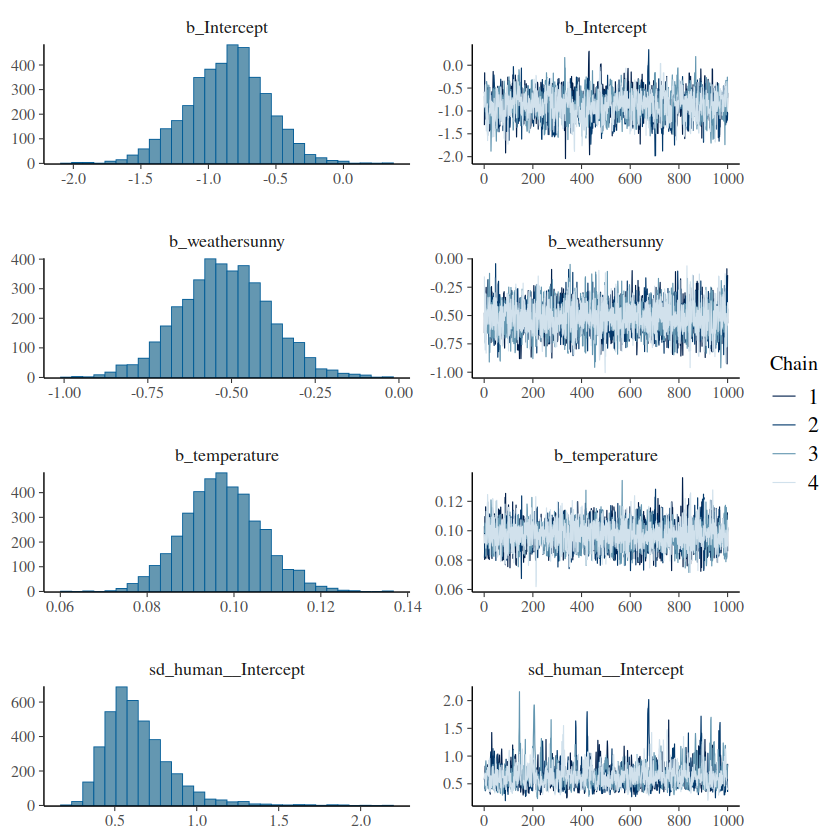

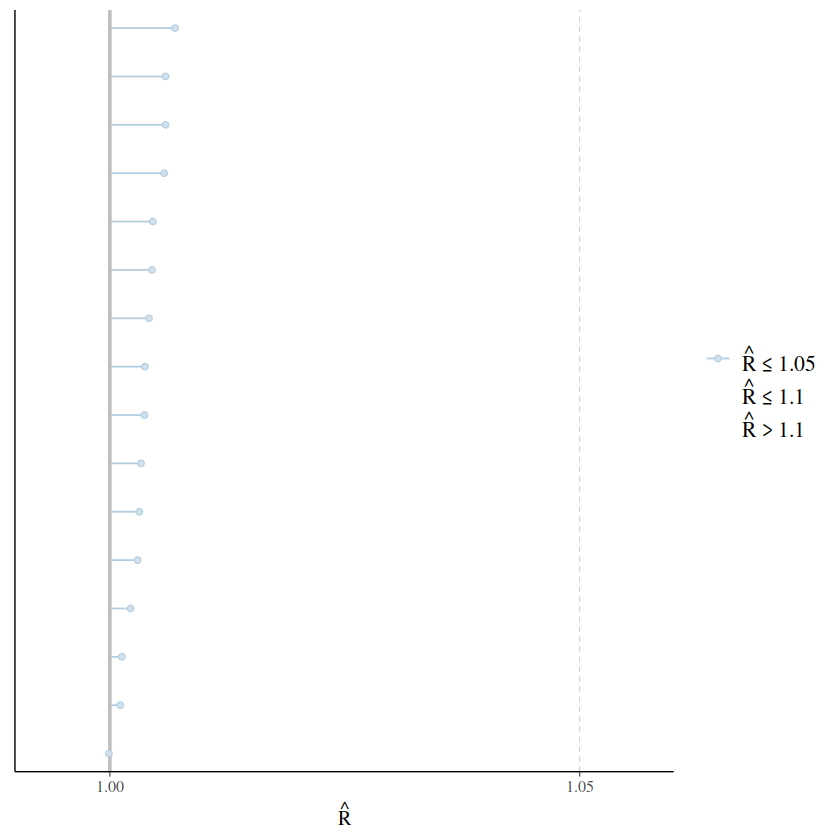

In [26]:
plot(glmm_pois_brms_human)
stanplot(glmm_pois_brms_human, type = "rhat")


In [27]:
ranef(glmm_pois_brms_human)


$human
, , Intercept

     Estimate Est.Error       Q2.5       Q97.5
A  0.74761982 0.2596385  0.2385960  1.28769815
B  0.07638192 0.2997364 -0.5260997  0.65501691
C  0.68690877 0.2636616  0.1751580  1.24047088
D -0.61616181 0.3406731 -1.3276346  0.02161629
E -0.12407916 0.3020593 -0.7634732  0.45564106
F -0.73977888 0.3443352 -1.4651356 -0.13334758
G  0.44105046 0.2753595 -0.0766868  1.00041885
H -0.32240145 0.2955995 -0.9291005  0.23219879
I  0.01942899 0.2835579 -0.5351711  0.57584012
J -0.17533780 0.2916284 -0.7553172  0.40564216

Warning message:
“The following variables in 'conditions' are not part of the model:
'human'”


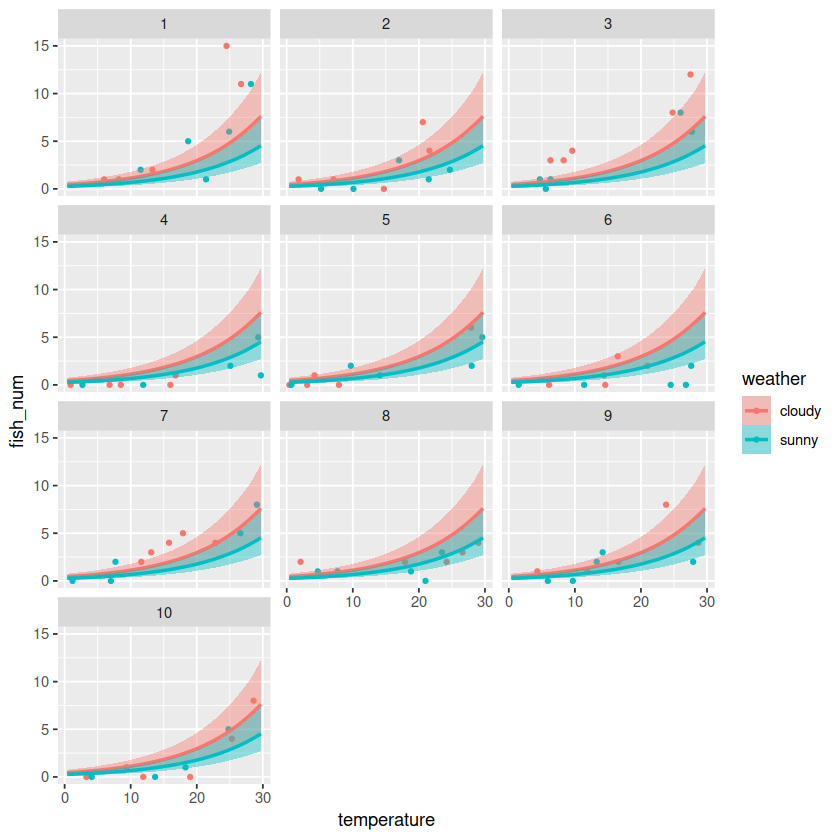

In [28]:
conditions <- data.frame(
  human = c("A", "B", "C", "D", "E", "F", "G", "H", "I", "J")
)
eff_glmm_human <- conditional_effects(
  glmm_pois_brms_human,
  effects = "temperature:weather",
  re_fomula = NULL,
  conditions = conditions
)
plot(eff_glmm_human, points = TRUE)
